In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

$$HourlyWidgetProduction = \alpha + \beta_1WorkerAgeFrom18+ \beta_2WorkerYearsinJob + \beta_3IsRoundWidget$$

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


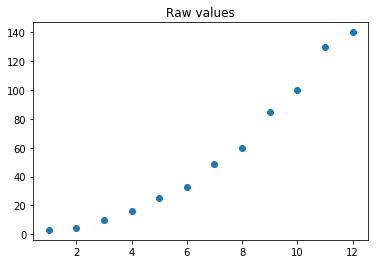

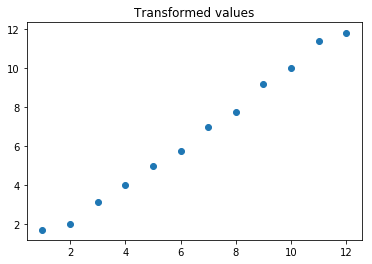

In [3]:
# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

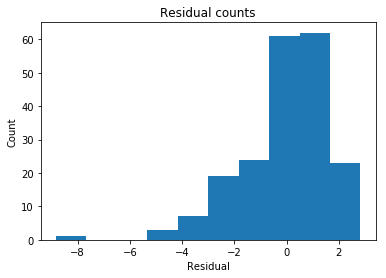

In [4]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

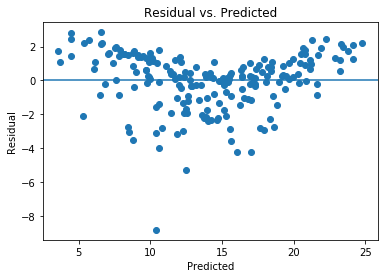

In [5]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

In [6]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


In [7]:
features = data.drop(['Unnamed: 0'], axis=1)

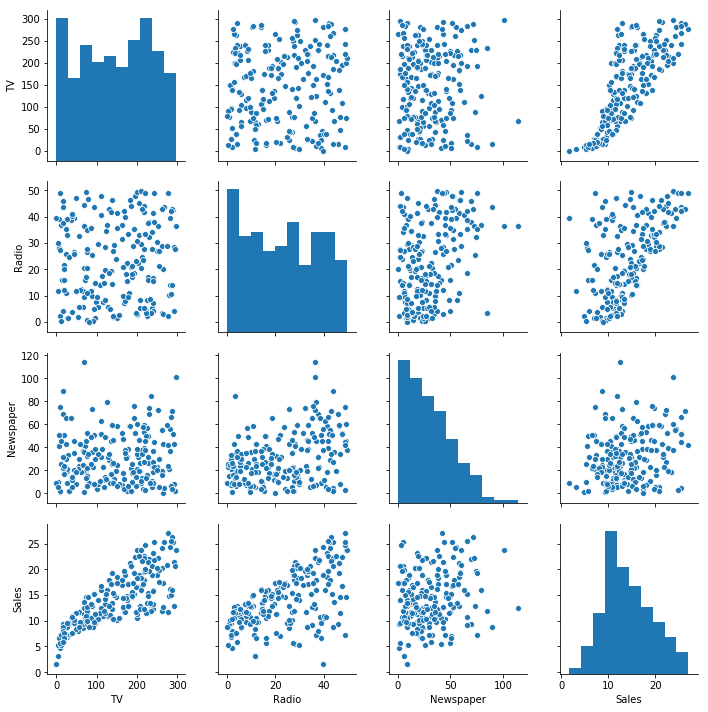

In [8]:
plt.rcParams['figure.figsize'] = 8, 8

sns.pairplot(features)

plt.show()

In [9]:
def plotcolumn(plotterm, features=features):
    plt.rcParams['figure.figsize'] = 12, 8
    fig = plt.figure()

    fig.add_subplot(231)
    plt.hist(features[plotterm])
    plt.title('{} Raw'.format(plotterm))

    fig.add_subplot(232)
    plt.hist(np.log(features[plotterm]+1))
    plt.title('{} Log'.format(plotterm))

    fig.add_subplot(233)
    plt.hist((features[plotterm])**2)
    plt.title('{} Square'.format(plotterm))
    
    fig.add_subplot(235)
    plt.hist(np.sqrt(features[plotterm]+1))
    plt.title('{} Square Root'.format(plotterm))
    
    ax3=fig.add_subplot(236)
    plt.hist(1/(features[plotterm]+1))
    plt.title('{} Inverse'.format(plotterm))
    plt.xticks(rotation=90)
    plt.show()

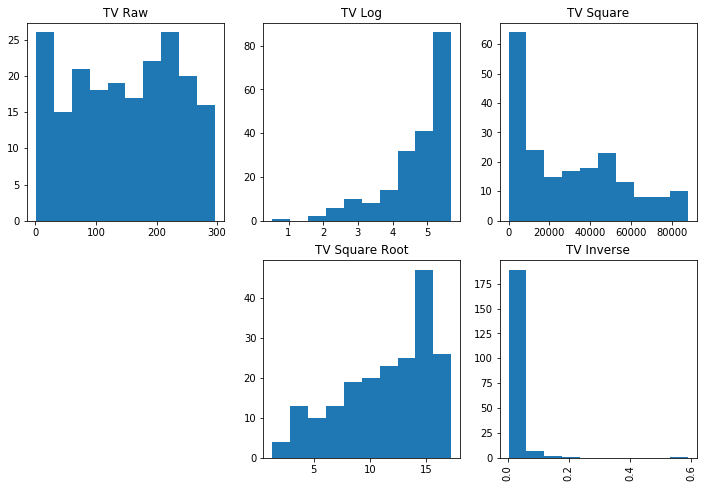

In [10]:
plotcolumn('TV')

TV looks to be most normal in its raw state.

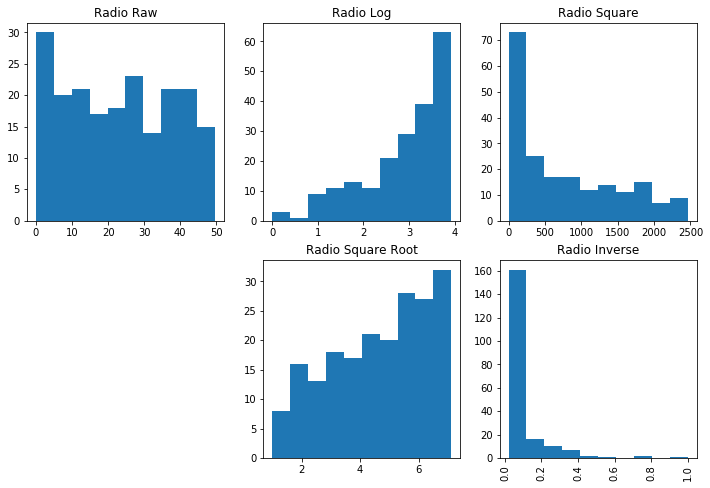

In [11]:
plotcolumn('Radio')

Like TV, Radio's raw data is the most normal.

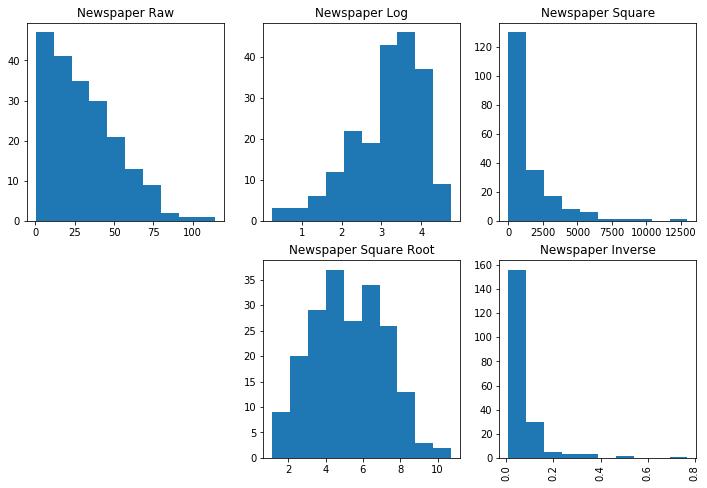

In [12]:
plotcolumn('Newspaper')

Newspaper appears to be most normal as a Square Root transformation.

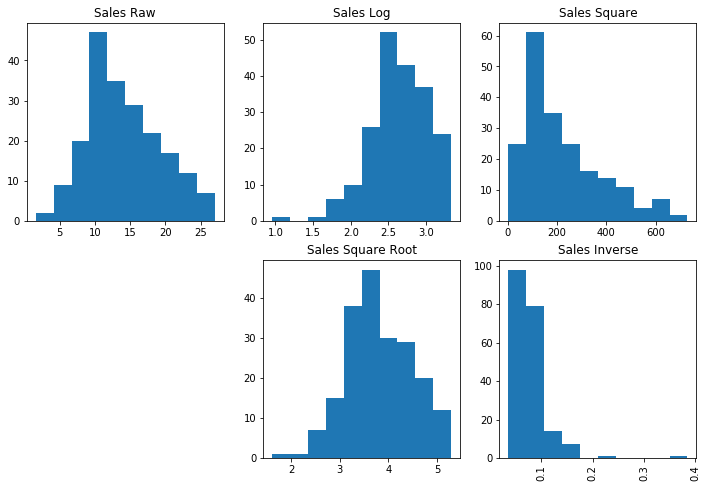

In [13]:
plotcolumn('Sales')

...As does Sales.

In [14]:
"""features['Sales'].describe()
features = features[features['Sales'] > 10.375]"""

"features['Sales'].describe()\nfeatures = features[features['Sales'] > 10.375]"

In [15]:
features['Sales'] = np.log(features['Sales']+1)

In [16]:
features.head()

,TV,Radio,Newspaper,Sales
0,230.100,37.800,69.200,3.140
1,44.500,39.300,45.100,2.434
2,17.200,45.900,69.300,2.332
3,151.500,41.300,58.500,2.970
4,180.800,10.800,58.400,2.632


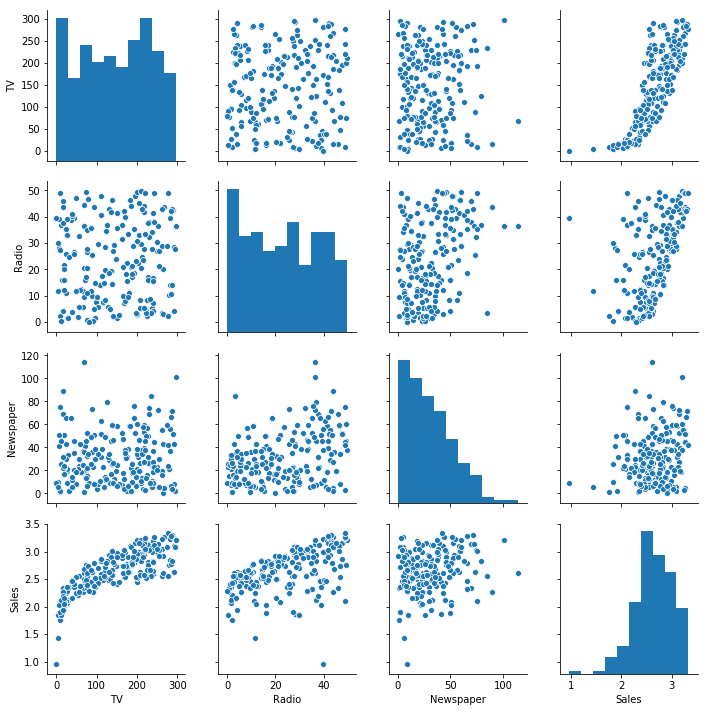

In [17]:
plt.rcParams['figure.figsize'] = 8, 8

sns.pairplot(features)

plt.show()

In [18]:
regr = linear_model.LinearRegression()
Y = features['Sales'].values.reshape(-1, 1)
X = features[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.00335061  0.01115925  0.00022362]]

Intercept: 
 [ 1.88561048]

R-squared:
0.826013247083


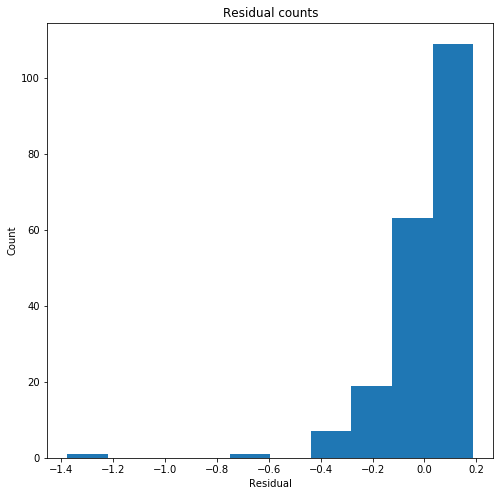

In [19]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = features['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This *still* looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

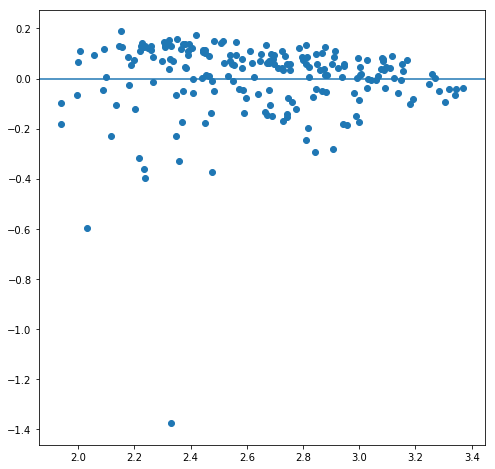

In [20]:
plt.scatter(predicted, residual)
plt.axhline(y=0)
plt.show()

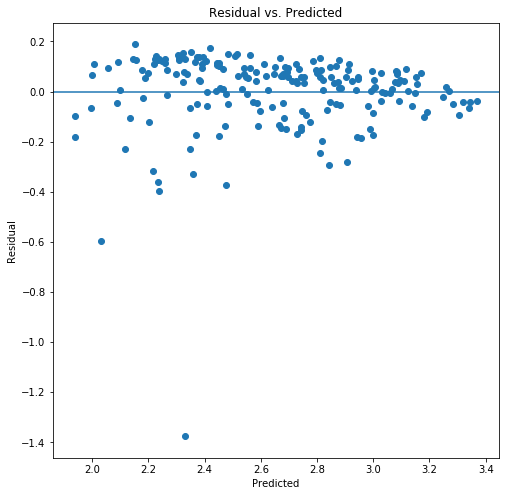

In [21]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [22]:
X.corr()

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


In [23]:
features['sqrtNewspaper'] = features['Newspaper'].apply(lambda x: np.sqrt(x))
features['sqrtSales'] = features['Sales'].apply(lambda x: np.sqrt(x))
features.drop(['Newspaper', 'Sales'], axis=1, inplace=True)

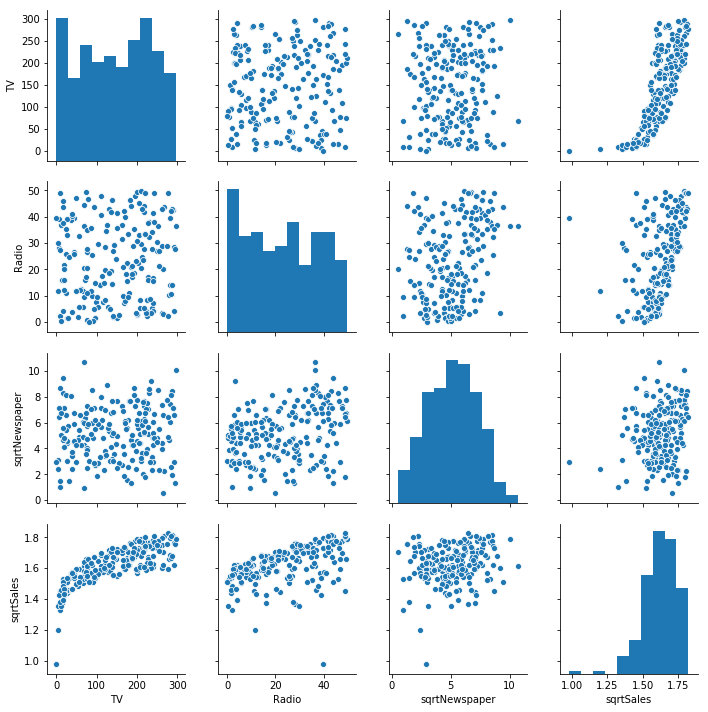

In [24]:
plt.rcParams['figure.figsize'] = 8, 8

sns.pairplot(features)

plt.show()

In [25]:
regr = linear_model.LinearRegression()
Y = features['sqrtSales'].values.reshape(-1, 1)
X = features[['TV','Radio','sqrtNewspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.00105978  0.00327946  0.00204477]]

Intercept: 
 [ 1.37918997]

R-squared:
0.780857084513


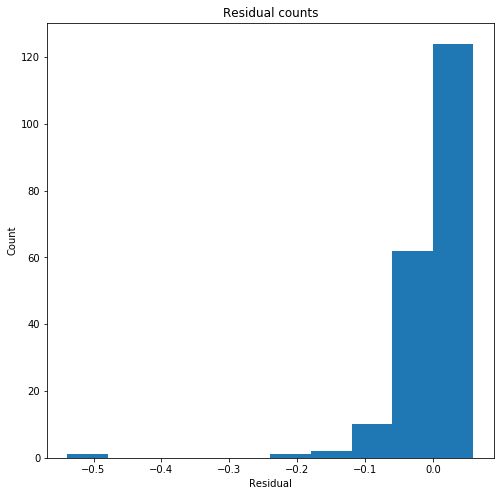

In [26]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = features['sqrtSales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This *still* looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

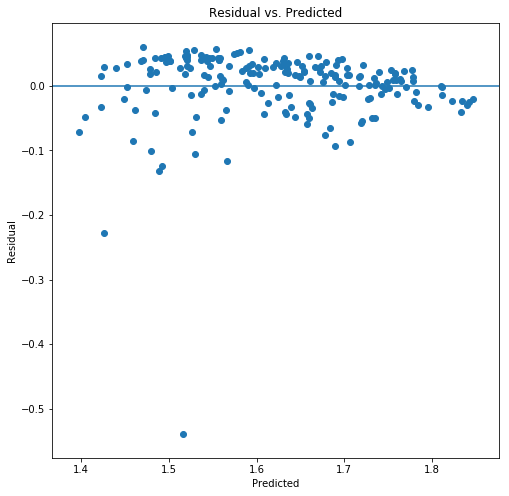

In [27]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

#This looks better.